In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, QuantileTransformer, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, QuantileTransformer, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, silhouette_score
from sklearn.decomposition import PCA


# **TASK 1**

In [ ]:
df = pd.read_csv('travel.csv')
df.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [ ]:
df.drop(['Unnamed: 0', 'date_time'], axis=1, inplace = True)

## **EDA and Preprocessing**

In [ ]:
df.shape

(100000, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   site_name                  100000 non-null  int64         
 1   posa_continent             100000 non-null  int64         
 2   user_location_country      100000 non-null  int64         
 3   user_location_region       100000 non-null  int64         
 4   user_location_city         100000 non-null  int64         
 5   orig_destination_distance  63915 non-null   float64       
 6   user_id                    100000 non-null  int64         
 7   is_mobile                  100000 non-null  int64         
 8   is_package                 100000 non-null  int64         
 9   channel                    100000 non-null  int64         
 10  srch_ci                    100000 non-null  datetime64[ns]
 11  srch_co                    100000 non-null  datetime6

In [ ]:
df.isna().sum()

,0
site_name,0
posa_continent,0
user_location_country,0
user_location_region,0
user_location_city,0
orig_destination_distance,36085
user_id,0
is_mobile,0
is_package,0
channel,0


In [ ]:
df['srch_ci'].fillna(df['srch_ci'].mode()[0], inplace=True)
df['srch_co'].fillna(df['srch_co'].mode()[0], inplace=True)

<ipython-input-21-78960d540a74>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['srch_ci'].fillna(df['srch_ci'].mode()[0], inplace=True)
<ipython-input-21-78960d540a74>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
rows_missing = ['orig_destination_distance', 'srch_ci', 'srch_co']

df['srch_ci'] = pd.to_datetime(df['srch_ci'])
df['srch_co'] = pd.to_datetime(df['srch_co'])

In [ ]:
df['srch_ci_day'] = df['srch_ci'].dt.day
df['srch_ci_month'] = df['srch_ci'].dt.month
df['srch_ci_year'] = df['srch_ci'].dt.year


In [ ]:
df['srch_co_day'] = df['srch_co'].dt.day
df['srch_co_month'] = df['srch_co'].dt.month
df['srch_co_year'] = df['srch_co'].dt.year

In [ ]:
df.drop(['srch_ci', 'srch_co'], axis=1, inplace=True)

In [ ]:
px = df.copy()
px.dropna(inplace=True)
py = px.pop('orig_destination_distance')


In [ ]:
lr = LinearRegression()
lr.fit(px, py)

LinearRegression()

In [ ]:
df.loc[(df['orig_destination_distance'].isna()), 'orig_destination_distance'] = lr.predict(df.loc[(df['orig_destination_distance'].isna()), px.columns])

In [ ]:
df['orig_destination_distance'].isna().sum()

0

### **Feature** **Selection**

<Axes: >

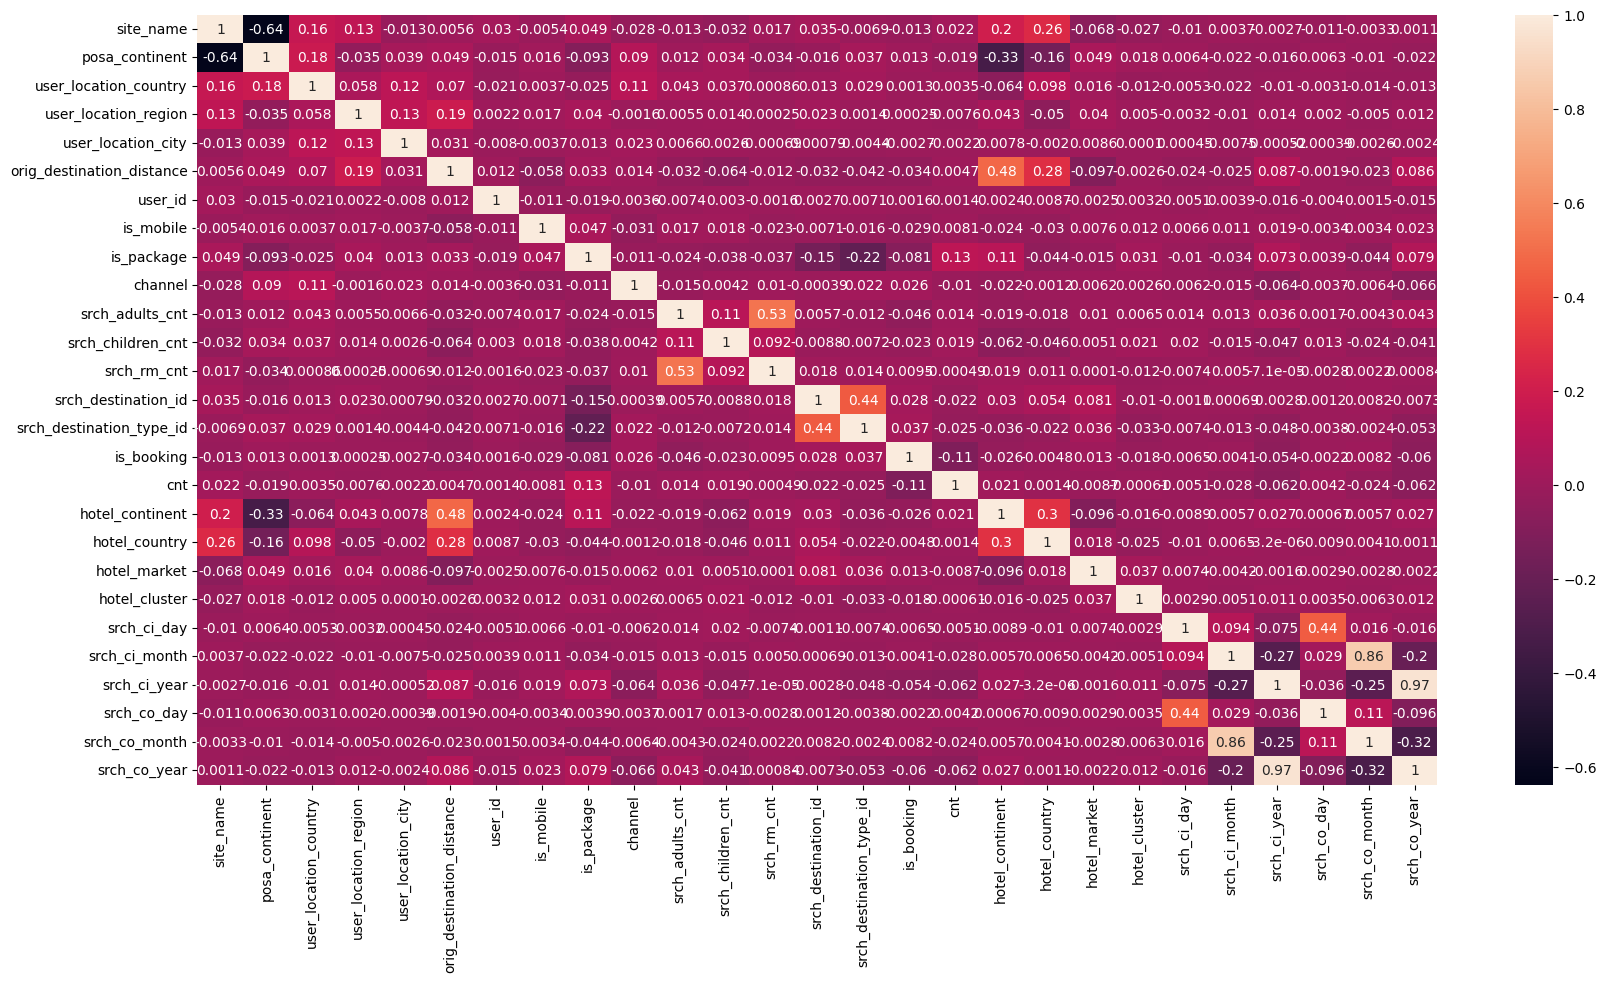

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

#### **Pearson's Correlation**

In [ ]:
def correlation(X, threshold):
    corr_set = set()
    corr_matrix = X.corr()

    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
          col_name = corr_matrix.columns[i]
          corr_set.add(col_name)

    return corr_set

corr_set = correlation(df, 0.7)
corr_set

{'srch_co_month', 'srch_co_year'}

In [ ]:
df.drop(corr_set, axis=1, inplace=True)

### **Finding best value for K**

Text(0.5, 1.0, 'The Elbow Method')

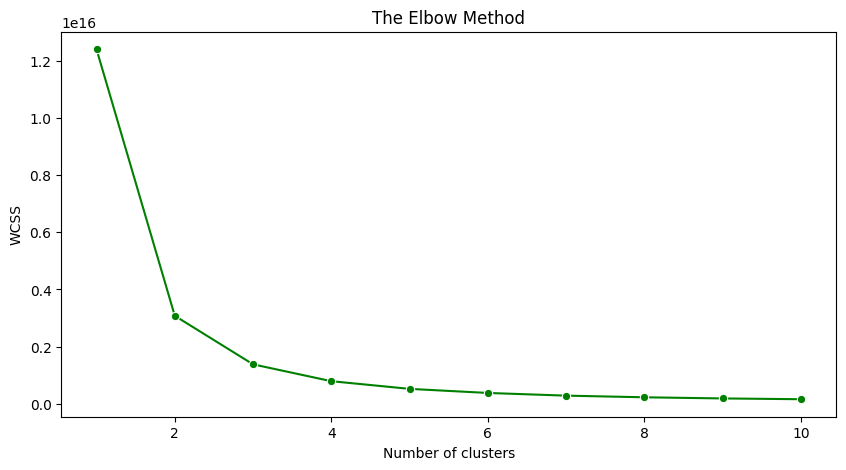

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(
      n_clusters = i,
      init = 'k-means++',
      max_iter=300,
      n_init=10,
      random_state=0
  )
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')



According to this elbow plot the optimal value for k seems to be 3.

In [ ]:
kmeans = KMeans(
      n_clusters = 3,
      init = 'k-means++',
      max_iter=300,
      n_init=10,
      random_state=0
)

pred = kmeans.fit_predict(df)

In [ ]:
silhouette_score(df, pred)

0.5813100518237795

# **Task 2**

In [ ]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **EDA And Preprocessing**

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.drop(['Description', 'CustomerID', 'InvoiceNo', 'StockCode'], axis=1, inplace=True)

In [ ]:
df.dtypes

,0
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
Country,object


In [ ]:
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year

In [ ]:
df.drop('InvoiceDate', axis=1, inplace=True)

## **Encoding**

In [ ]:
enc = LabelEncoder()
df['Country'] = enc.fit_transform(df['Country'])

## **Feature Selection**

<Axes: >

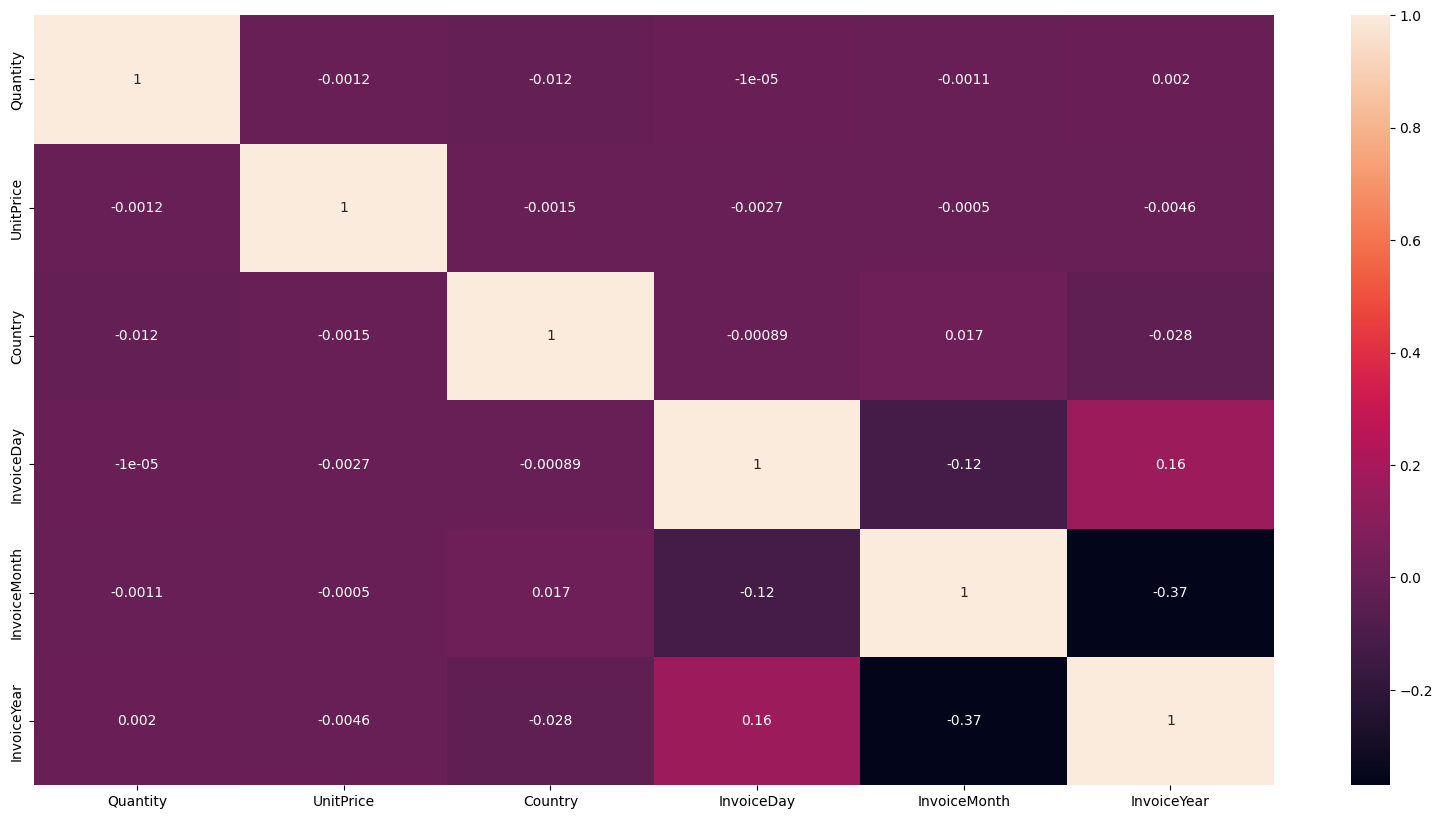

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

### **Removing High Correlation Features**

In [ ]:
def correlation(X, threshold):
    corr_set = set()
    corr_matrix = X.corr()

    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
          col_name = corr_matrix.columns[i]
          corr_set.add(col_name)

    return corr_set

corr_set = correlation(df, 0.7)
corr_set

set()

### **Removing Low Varience Features**

In [ ]:
var_threshold = VarianceThreshold(threshold=0.1)
df_reduced = var_threshold.fit_transform(df)
df = pd.DataFrame(df_reduced, columns=df.columns[var_threshold.get_support()])


## **Standardizing Data**

In [ ]:
scaler = QuantileTransformer()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [ ]:
df.head()

,Quantity,UnitPrice,Country,InvoiceDay,InvoiceMonth
0,0.638138,0.588088,0.543544,0.0,1.0
1,0.638138,0.692693,0.543544,0.0,1.0
2,0.695696,0.600601,0.543544,0.0,1.0
3,0.638138,0.692693,0.543544,0.0,1.0
4,0.638138,0.692693,0.543544,0.0,1.0


In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

Text(0.5, 1.0, 'The Elbow Method')

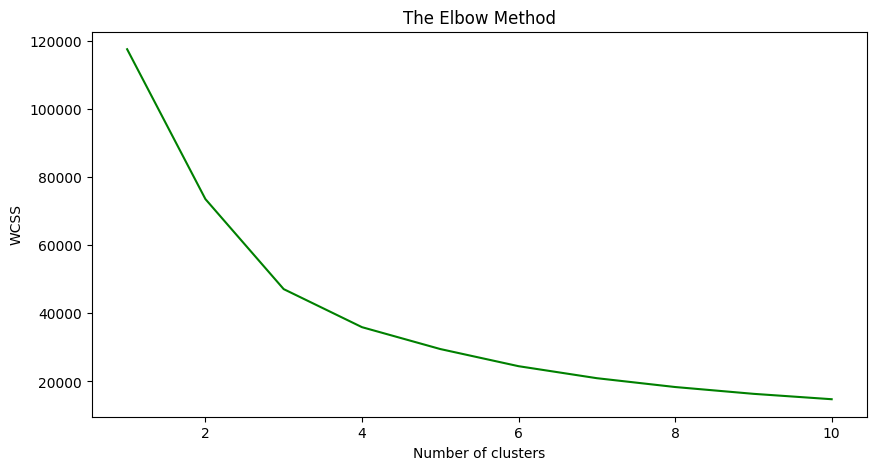

In [ ]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(
      n_clusters = i,
      init = 'k-means++',
      max_iter = 300,
      n_init = 10,
      random_state = 0
  )
  kmeans.fit(df_pca)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, color='green')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(
      n_clusters = i,
      init = 'k-means++',
      max_iter=300,
      n_init=10,
      random_state=0
  )
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')

In [ ]:
kmeans = KMeans(
      n_clusters = 4,
      init = 'k-means++',
      max_iter=300,
      n_init=10,
      random_state=0
)
pred = kmeans.fit_predict(df)

In [ ]:
pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

# **Task 3**

In [ ]:
df = pd.read_csv('Finance_data.csv')
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [ ]:
df[['Expect_upper', 'Expect_lower']] = df['Expect'].str.split('-', expand = True)

In [ ]:
df['Expect_upper'] = df['Expect_upper'].str.rstrip('%').astype('float')/100
df['Expect_lower'] = df['Expect_lower'].str.rstrip('%').astype('float')/100

In [ ]:
df.drop('Expect', axis=1, inplace=True)
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Invest_Monitor,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,Expect_upper,Expect_lower
0,Female,34,Yes,1,2,5,3,7,6,4,...,Monthly,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines,0.2,0.3
1,Female,23,Yes,4,3,2,1,5,6,7,...,Weekly,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants,0.2,0.3
2,Male,30,Yes,3,6,4,2,5,1,7,...,Daily,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television,0.2,0.3
3,Male,22,Yes,2,1,3,7,6,4,5,...,Daily,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet,0.1,0.2
4,Female,24,No,2,1,3,6,4,5,7,...,Daily,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet,0.2,0.3


In [ ]:
df['Duration'] = df['Duration'].str.replace(r'[^0-9-]', '', regex=True)

In [ ]:
df[['Duration_lower', 'Duration_upper']] = df['Duration'].str.split('-', expand=True)

In [ ]:
df.drop('Duration', axis=1, inplace=True)

In [ ]:
df.dtypes

,0
gender,object
age,int64
Investment_Avenues,object
Mutual_Funds,int64
Equity_Market,int64
Debentures,int64
Government_Bonds,int64
Fixed_Deposits,int64
PPF,int64
Gold,int64


In [ ]:
enc = LabelEncoder()
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = enc.fit_transform(df[column])


In [ ]:
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,Expect_upper,Expect_lower,Duration_lower,Duration_upper
0,0,34,1,1,2,5,3,7,6,4,...,2,0,0,1,0,2,0.2,0.3,0,0
1,0,23,1,4,3,2,1,5,6,7,...,1,1,0,1,1,0,0.2,0.3,2,2
2,1,30,1,3,6,4,2,5,1,7,...,2,0,2,0,0,3,0.2,0.3,1,1
3,1,22,1,2,1,3,7,6,4,5,...,2,1,1,2,1,1,0.1,0.2,0,2
4,0,24,0,2,1,3,6,4,5,7,...,2,0,0,1,2,1,0.2,0.3,0,2


In [ ]:
scaler = QuantileTransformer()

df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (40). n_quantiles is set to n_samples.
  warnings.warn(


In [ ]:
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df)

In [ ]:
kmeans = KMeans(
    n_clusters = 3,
    init = 'k-means++',
    max_iter = 300,
    n_init = 10,
    random_state = 0
)
pred = kmeans.fit_predict(df_pca)

In [ ]:
pred

array([1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2], dtype=int32)